##GPU kontrolü

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
!ls

MyDrive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17725813764974795206, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15096794963219700556
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

##Veri Setinin yüklenmesi

In [ ]:
data_path = "/gdrive/My Drive/TezCalismalari/GarbageDataset/Garbage classification/Garbage classification"
data_path

'/gdrive/My Drive/TezCalismalari/GarbageDataset/Garbage classification/Garbage classification'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import os

os.chdir('/gdrive/My Drive')

In [ ]:
!ls

KerasileDerinOgrenme  OrnekKodlar     Untitled0.ipynb
ObjectDetection       TezCalismalari


In [ ]:
import numpy as np # Dizi ve matris işlemleri için özelleşmiş bir kütüphanedir.
import matplotlib.pyplot as plt #Grafikleştirme işlemleri için kullanılan kütüphanedir.
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
#Eğitim öncesi görüntü ayarlarını yapmak için kullanılır.
#Görüntü artırma, ölçeklendirme gibi işlemler.

In [ ]:
import glob, os#dosya işlemleri için kullanılan kütüphanelerdir.
import random 

In [ ]:
#Dosya yolu
base_path = "/gdrive/My Drive/TezCalismalari/GarbageDataset/Garbage classification/Garbage classification"
#dosyadan okunan fotoğrafların yüklendiği değişken
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2527


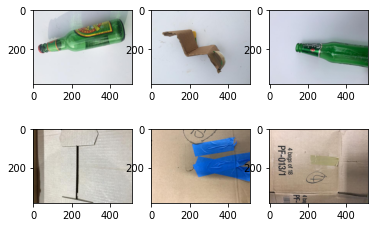

In [ ]:
#Verisetinden örnek bir kaç görüntü
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,#Ölçeklendirme, verilen değerle çarpılır.
    shear_range=0.1,#Kesme açısı
    zoom_range=0.1,#Rastgele yaklaştırma
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,#Girilen değeri rastgele yatay çevirme.
    vertical_flip=True,#Girilen değeri rastgele dikey çevirme.
    validation_split=0.1#Doğrulama için ayrılan val'ın oranı
)

test_datagen = ImageDataGenerator(
    rescale=1./255,#ölçeklendirme
    validation_split=0.1#Doğrulama için ayrılan val'ın oranı
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),#Fotoğrafın kaça kaç olacağı
    class_mode='categorical',#Sınıfların sırasını kontrol etmek için kullanılır
    subset='training',#Alt küme ayarlama validation/training
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),#Fotoğrafın kaça kaç olacağı
    class_mode='categorical',
    subset='validation',#Alt küme ayarlama validation/training
    seed=0
)
#Etiketlerin görüntülenmesi
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


## Derin öğrenme kütüphanelerinin yüklenmesi

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Modelin oluşturulması

In [ ]:

model = Sequential()
   
model.add(Conv2D(32,(3,3), #Konvolüsyon katmanı
                 padding='same', 
                 input_shape=(300,300,3),#Görüntü girdi boyutu
                 activation='relu'))#Aktivasyon fonksiyonu
model.add(MaxPooling2D(pool_size=(2,2))) #Havuzlama katmanı

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())#düzleştirme katmanı
model.add(Dense(1024,activation='relu'))#tam bağlı katman
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))#Çıkış katmanı

model.summary()#model özeti

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 150, 150, 128)     36992     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 37, 37, 64)       

## Modelin Derlenmesi

In [ ]:
#Model derleme işlemleri. 
model.compile(
    loss='categorical_crossentropy', #Kayıp fonksiyonu
    optimizer='adam',#Optimizasyon fonksiyonu
     metrics=['accuracy'])#Doğruluk ölçütü-değeri

## Early Stopping ve Model Checkpoint

In [ ]:
model_path="garbage_cnn.h5"#kaydedilecek modelin ismi
es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=15)#aşırı öğrenmeyi önlemek için kullanılır.
checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#modelin en iyi durumunu kaydetmek için kullanılır.
callbacks_list = [es,checkpoint1]

In [ ]:
batch_size = 64 #Bir seferde verilecek veri yığını boyutu
num_epochs = 350 #iterasyon sayısı

#bir iterasyonda verilecek train ve test verilerinin oranlanması
step_size_train=train_generator.n//batch_size
step_size_validation =validation_generator.n//batch_size

## Modelin eğitilmesi


In [ ]:
history = model.fit_generator(
    generator=train_generator, #Eğitim verisi
    epochs=num_epoch, #iterasyon sayısı
    steps_per_epoch=steps_per_epoch, 
    validation_data=validation_generator,#Test verisi
    validation_steps=validation_steps,
    callbacks=callbacks_list#Early stopping ve model checkpoint değerleri
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/350
35/35 [==============================] - 25s 687ms/step - loss: 1.8553 - accuracy: 0.2094 - val_loss: 1.7414 - val_accuracy: 0.1979

Epoch 00001: val_accuracy improved from -inf to 0.19792, saving model to garbage_cnn.h5
Epoch 2/350
35/35 [==============================] - 24s 690ms/step - loss: 1.7218 - accuracy: 0.1900 - val_loss: 1.7329 - val_accuracy: 0.2708

Epoch 00002: val_accuracy improved from 0.19792 to 0.27083, saving model to garbage_cnn.h5
Epoch 3/350
35/35 [==============================] - 25s 709ms/step - loss: 1.6120 - accuracy: 0.3452 - val_loss: 1.5847 - val_accuracy: 0.3958

Epoch 00003: val_accuracy improved from 0.27083 to 0.39583, saving model to garbage_cnn.h5
Epoch 4/350
35/35 [==============================] - 24s 691ms/step - loss: 1.5492 - accuracy: 0.3478 - val_loss: 1.4959 - val_accuracy: 0.4062

Epoch 00004: val_accuracy improved from 0.39583 to 0.40625, saving model to garbage_cnn.h5
Epoch 5/350
35/35 [==============================] - 24s 69

## Sonuç Skoru

In [ ]:
score = model.evaluate(validation_generator,batch_size=32)
score
print('Score Accuracy : {:.2f}%'.format(score[1]*100))

8/8 [==============================] - 2s 298ms/step - loss: 0.6569 - accuracy: 0.7809
Score Accuracy : 78.09%


## Sonuçların görselleştirilmesi

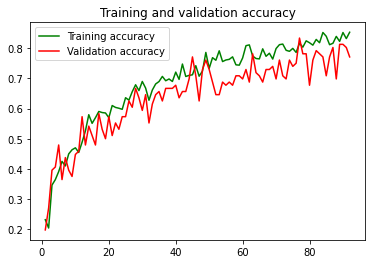

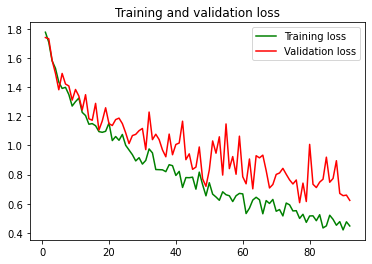

In [ ]:
#Eğitim sürecinin görselleştirilmesi

import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'g', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'g', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()